In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



In [13]:
raw_data = []
filename = 'ASTR19_F25_group_project_data.txt'

try:
    with open(filename, 'r') as f:
        print(f"Reading from {filename}...")
        for line in f:
            # Skip comments or empty lines
            if line.startswith('#') or not line.strip():
                continue
            
            parts = line.split()
            
            if len(parts) == 3:
                try:
                    day = int(parts[0])
                    time_str = parts[1]
                    height = float(parts[2])
                    raw_data.append((day, time_str, height))
                except ValueError:
                    continue 

    print(f"Successfully loaded {len(raw_data)} data points.")

except FileNotFoundError:
    print(f"ERROR: Could not find '{filename}'. Please make sure the file is in the same folder.")
    raw_data = [(1, "00:00", 0.0)]

Reading from ASTR19_F25_group_project_data.txt...
Successfully loaded 82 data points.


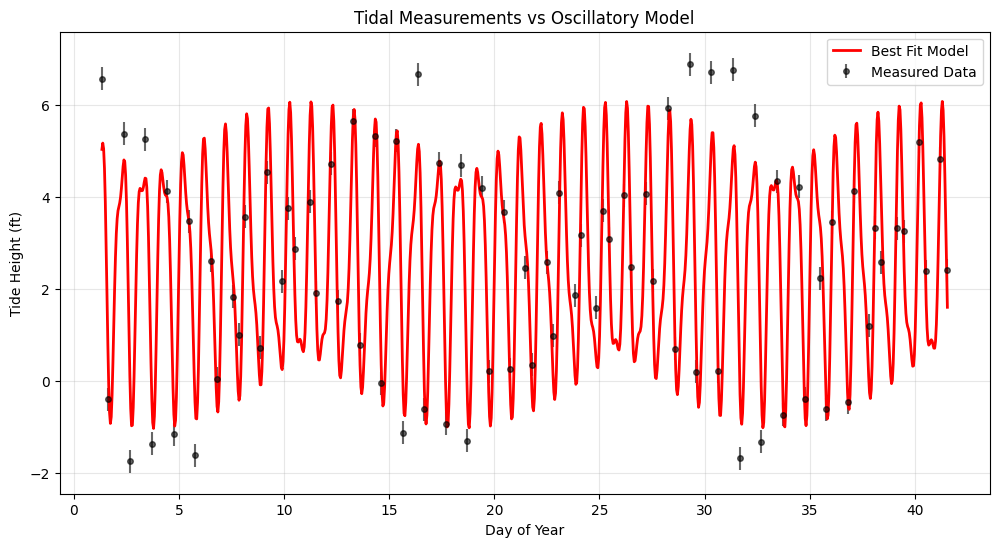

In [14]:
time_days = []
heights = []

for day, time_str, height in raw_data:
    h, m = map(int, time_str.split(':'))
    fractional_day = day + (h / 24.0) + (m / 1440.0)
    time_days.append(fractional_day)
    heights.append(height)

x_data = np.array(time_days)
y_data = np.array(heights)
y_err = 0.25

def oscillatory_function(t, amp1, omega1, phase1, amp2, omega2, phase2, offset):
    return (amp1 * np.sin(omega1 * t + phase1) + 
            amp2 * np.sin(omega2 * t + phase2) + 
            offset)

p0 = [3.0, 12.15, 0, 2.0, 6.28, 0, 2.0]
lower_bounds = [0, 11.5, -np.inf, 0, 5.5, -np.inf, -5]
upper_bounds = [10, 13.0, np.inf, 10, 7.0, np.inf, 5]

params, covariance = curve_fit(
    oscillatory_function,
    x_data,
    y_data,
    p0=p0,
    bounds=(lower_bounds, upper_bounds),
    sigma=np.full(len(y_data), y_err)
)

plt.figure(figsize=(12, 6))
plt.errorbar(x_data, y_data, yerr=y_err, fmt='o', label='Measured Data', color='black', alpha=0.6, markersize=4)

x_model = np.linspace(min(x_data), max(x_data), 1000)
y_model = oscillatory_function(x_model, *params)

plt.plot(x_model, y_model, 'r-', label='Best Fit Model', linewidth=2)
plt.xlabel('Day of Year')
plt.ylabel('Tide Height (ft)')
plt.title('Tidal Measurements vs Oscillatory Model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('tidal_model_fit.png')
plt.show()
